# EDA
The main goal of the EDA is to identify interesting business patterns by investigating business attributes and other data such as review count, star ratings, price range, cuisines, user reviews, and its location.

In [66]:
# Import essentials
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Set white grid styling
sns.set_style('whitegrid')
sns.set(font_scale=1) # Font size

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [333]:
# Utilize helper functions
%run helper_functions.ipynb

In [334]:
# Read dataset files
business_df = pd.read_csv('./dataset/clean_business.csv', index_col=0)
checkin_df = pd.read_csv('./dataset/clean_checkin.csv', index_col=0)
review_df = pd.read_csv('./dataset/clean_review.csv', index_col=0)
tip_df = pd.read_csv('./dataset/clean_tip.csv', index_col=0)
user_df = pd.read_csv('./dataset/user.csv', index_col=0)

In [335]:
review_df.isna().sum()

review_id        0
user_id          0
business_id      0
stars            0
text             0
cool             0
useful           0
date             0
neg              0
neu              0
pos              0
compound         0
review_type      0
average_stars    0
text_count       0
dtype: int64

In [336]:
review_df.dropna(inplace=True)

## 1) Analyze Business Dataset
1. Check dataframe for its outliers - remove outliers when applicable
2. Visualize average star rating, price, review count, # of businesses for open and closed businesses
3. Visualize businesses' lifespan and its review count trend in 30, 60, 90, 180, and 365 days.
4. Visualize businesses' revenues vs Business Age
5. Identifying top 5 most common cuisines and venues
6. Visualize average star ratings per cuisines and venues

### 1.1 Check dataframe for its outliers - remove outliers when applicable

In [337]:
business_df.describe()

,review_count,stars,adjusted_stars,price,is_open,caters,goodforkids,alcohol,goodforgroups,tableservice,...,live,jukebox,dj,background_music,karaoke,video,average noise,loud noise,quiet,very loud
count,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,...,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000,44046.000000
mean,71.777959,3.428620,3.548307,1.767493,0.631385,0.293284,0.534441,0.761817,0.646052,0.206466,...,0.024361,0.006902,0.008605,0.005903,0.001771,0.000545,0.782409,0.051106,0.144712,0.021773
std,192.894490,0.771308,0.372010,0.615793,0.482435,0.455273,0.498818,0.425976,0.478199,0.404773,...,0.154169,0.082791,0.092362,0.076604,0.042045,0.023337,0.412612,0.220216,0.351815,0.145942
min,3.000000,1.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,3.270000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,20.000000,4.000000,3.670000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,63.000000,4.000000,3.850000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,10129.000000,5.000000,4.990000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [338]:
# Open businesses statistics
business_df[business_df['is_open'] == 1]['review_count'].describe()

count    27810.000000
mean        91.985437
std        230.384053
min          3.000000
25%          9.000000
50%         27.000000
75%         86.000000
max      10129.000000
Name: review_count, dtype: float64

In [339]:
# Close businesses statistics
business_df[business_df['is_open'] == 0]['review_count'].describe()

count    16236.000000
mean        37.165373
std         90.176093
min          3.000000
25%          6.000000
50%         13.000000
75%         35.000000
max       5494.000000
Name: review_count, dtype: float64

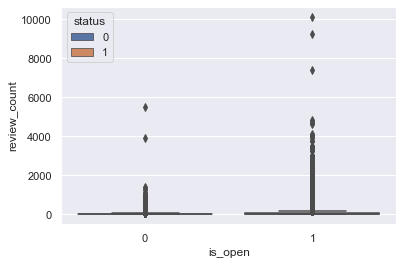

In [340]:
sns.boxplot(x='is_open', y='review_count', hue='is_open', data=business_df, dodge=False)
plt.legend(loc='upper left', title='status');

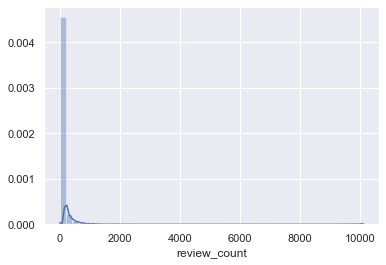

In [341]:
sns.distplot(business_df['review_count'])

In [342]:
business_df.shape

(44046, 144)

Removing extreme outliers to prevent decrease in statistical power.

In [343]:
q_low = business_df['review_count'].quantile(0.01)
q_hi  = business_df['review_count'].quantile(0.99)

business_df = business_df[(business_df['review_count'] < q_hi) & (business_df['review_count'] > q_low)]
business_df.shape

(39824, 144)

In [344]:
# Update review dataframe since extreme outliers are removed
m = review_df['business_id'].isin(business_df['business_id'])
review_df = review_df[m].reset_index(drop=True)

### 1.2 Visualize average star rating, price, review count, # of businesses for open and closed businesses

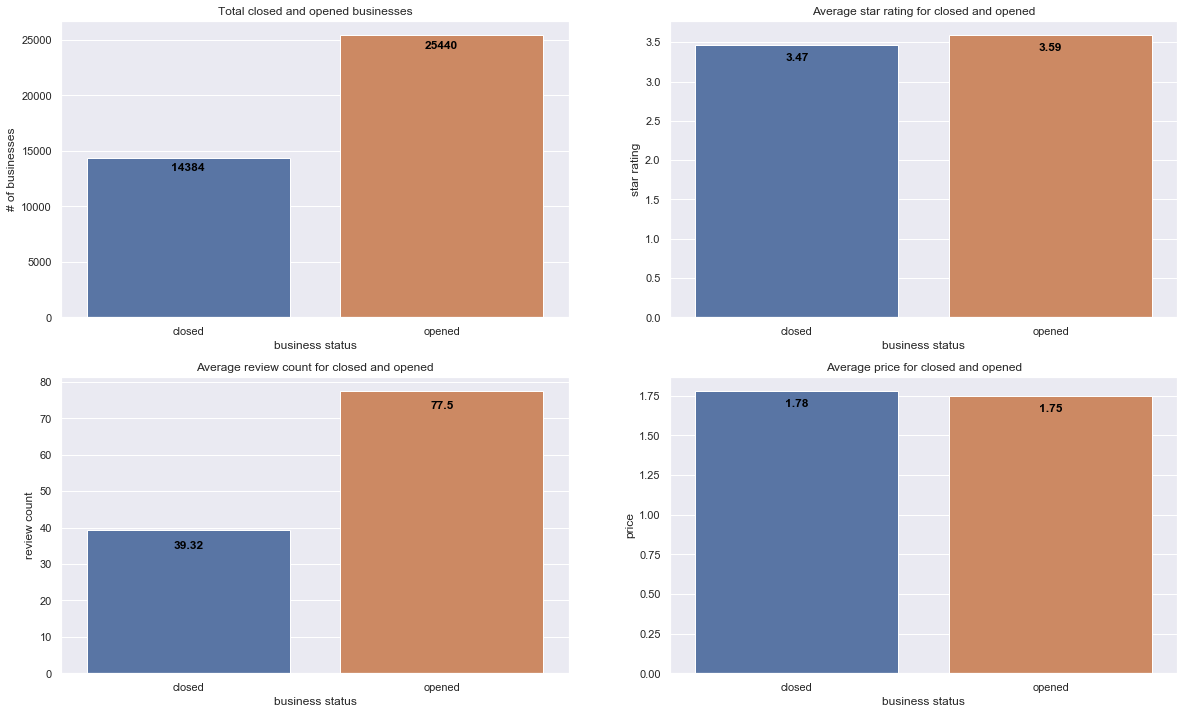

In [345]:
closed_business_df = business_df[business_df['is_open'] == 0]
opened_business_df = business_df[business_df['is_open'] == 1]

# Getting average star, review_count, and price values 
avg_closed_star, avg_closed_review, avg_closed_price = getAverageValues(closed_business_df)
avg_opened_star, avg_opened_review, avg_opened_price = getAverageValues(opened_business_df)

# Create status dataframe
d = {'status': ['closed', 'opened'], 
     'count': [len(closed_business_df.index), len(opened_business_df.index)],
     'avg_star': [avg_closed_star, avg_opened_star], 
     'avg_review_count': [avg_closed_review, avg_opened_review], 
     'avg_price': [avg_closed_price, avg_opened_price]}

status_df = pd.DataFrame(data=d)

# Positioning plots
fig, ((ax_one, ax_two), (ax_three, ax_four)) = plt.subplots(nrows=2,ncols=2, figsize=(20, 12))

sns.barplot(x='status', y='count', data=status_df, ax=ax_one)
sns.barplot(x='status', y='avg_star', data=status_df, ax=ax_two)
sns.barplot(x='status', y='avg_review_count', data=status_df, ax=ax_three)
sns.barplot(x='status', y='avg_price', data=status_df, ax=ax_four)

ax_one.set(xlabel='business status', ylabel='# of businesses', title='Total closed and opened businesses')
ax_two.set(xlabel='business status', ylabel='star rating', title='Average star rating for closed and opened')
ax_three.set(xlabel='business status', ylabel='review count', title='Average review count for closed and opened')
ax_four.set(xlabel='business status', ylabel='price', title='Average price for closed and opened')

# Annotate values
for row in status_df.itertuples():
    ax_one.text(row.Index, row.count - 1200, row.count, color='black', ha='center', weight='bold')
    ax_two.text(row.Index, row.avg_star - 0.2, row.avg_star, color='black', ha='center', weight='bold')
    ax_three.text(row.Index, row.avg_review_count - 5, row.avg_review_count, color='black', ha='center', weight='bold')
    ax_four.text(row.Index, row.avg_price - 0.1, row.avg_price, color='black', ha='center', weight='bold')

Open businesses tend to have higher average values across the board. One interesting finding from these bargraphs are that the average review count is significantly higher for open businesses than closed businesses which makes me hypothesize that more reviews means more foot traffic to the restaurant (higher chance of remaining open), which using this feature may yield considerable weight in accurately predicting restaurant is likely to be successful during machine learning part of the project. 

### 1.3 Visualize businesses' lifespan and its review count trend in 30, 60, 90, 180, and 365 days
Each businesses' lifespan, 30, 60, 90, 180 and 365 days are defined to see any trend for both open and closed businesses.

In [346]:
# Get business lifespan (years) as well as its # of reviews from last 30, 60, 90, 180, and 365 days
agg_review_df = review_df.groupby(['business_id'])['date'].apply(set_review_count).unstack().reset_index()
agg_review_df.head(1)

,business_id,30_days_review_count,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan
0,--1UhMGODdWsrMastO9DZw,1.0,0.0,1.0,0.0,2.0,3.6


In [347]:
# Merge to add open status column
agg_review_df = business_df[['business_id','is_open']].merge(agg_review_df, on='business_id', how='inner')
agg_review_df.head(3)

,business_id,is_open,30_days_review_count,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan
0,pQeaRpvuhoEqudo3uymHIQ,1,1.0,0.0,0.0,0.0,0.0,6.07
1,lu7vtrp_bE9PnxWfA8g4Pg,1,1.0,0.0,0.0,0.0,0.0,6.30
2,DCsS3SgVFO56F6wRO_ewgA,0,3.0,1.0,0.0,3.0,1.0,0.59


In [348]:
agg_review_df.lifespan.unique()

array([ 6.07,  6.3 ,  0.59, ..., 14.18, 14.49, 14.76])

In [349]:
# Split dataframe based on is_open value to visualize average review_count per day categories
close_df = agg_review_df[agg_review_df['is_open'] == 0].reset_index(drop=True)
open_df = agg_review_df[agg_review_df['is_open'] == 1].reset_index(drop=True)

# Drop business_id and is_open columns
close_df = close_df.drop(['business_id', 'is_open'], axis=1)
open_df = open_df.drop(['business_id', 'is_open'], axis=1)

#### Comparing closed and open businesses' statistics

In [350]:
close_df.describe()

,30_days_review_count,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,1.593646,0.689447,0.743813,2.531424,5.312291,3.637193
std,1.260370,1.508965,1.593522,4.873965,9.953501,2.764641
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.420000
50%,1.000000,0.000000,0.000000,1.000000,2.000000,2.920000
75%,2.000000,1.000000,1.000000,3.000000,6.000000,5.252500
max,30.000000,44.000000,46.000000,128.000000,166.000000,14.860000


In [351]:
open_df.describe()

,30_days_review_count,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan
count,25440.000000,25440.000000,25440.000000,25440.000000,25440.000000,25440.000000
mean,2.283648,1.274528,1.327909,4.183333,7.717217,5.775761
std,2.890722,2.881647,2.917060,8.602231,15.430861,3.682135
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,2.530000
50%,1.000000,0.000000,0.000000,1.000000,3.000000,5.420000
75%,2.000000,1.000000,1.000000,4.000000,8.000000,8.840000
max,128.000000,83.000000,70.000000,185.000000,435.000000,15.160000


### 1.4 Plot closed and open business count by lifespan
- Identify # of closed and open businesses by its business lifespan

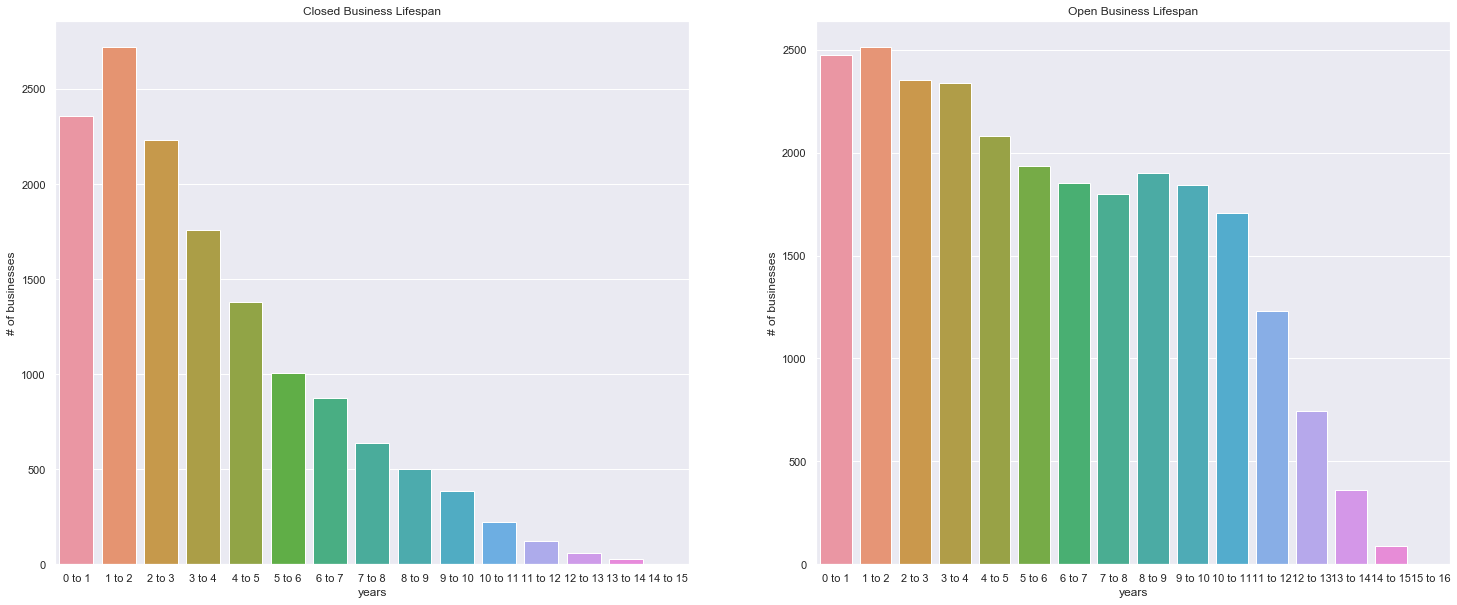

In [352]:
# Create lifespan dataframe for closed and open buisnesses
closed_biz_by_age_df = create_lifespan_df(close_df)
open_biz_by_age_df = create_lifespan_df(open_df)

# Plot
fig, (ax_one, ax_two) = plt.subplots(ncols=2, figsize=(25, 10))

sns.barplot(x='years', y='business_count', data=closed_biz_by_age_df, ax=ax_one)
sns.barplot(x='years', y='business_count', data=open_biz_by_age_df, ax=ax_two)

ax_one.set(xlabel='years', ylabel='# of businesses', title='Closed Business Lifespan')
ax_two.set(xlabel='years', ylabel='# of businesses', title='Open Business Lifespan');

Majority of the businesses fail within first 3 years; closed businesses' downward trend is more apparent compared to open businesses. Open businesses tend to have a lot more businesses spread out in all lifespan categories. 

Scaling all columns except business_id and is_open in range between 0 to 1

In [353]:
agg_review_df.iloc[:, 2:7] = agg_review_df.iloc[:, 2:7].apply(
    lambda x: round((x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)),2))

In [354]:
# Split dataframe based on is_open value to visualize average review_count per day categories
close_df = agg_review_df[agg_review_df['is_open'] == 0].reset_index(drop=True)
open_df = agg_review_df[agg_review_df['is_open'] == 1].reset_index(drop=True)

# Drop business_id and is_open columns
close_df = close_df.drop(['business_id', 'is_open'], axis=1)
open_df = open_df.drop(['business_id', 'is_open'], axis=1)

In [355]:
flattened_close_df = flatten_df(close_df)
flattened_open_df = flatten_df(open_df)

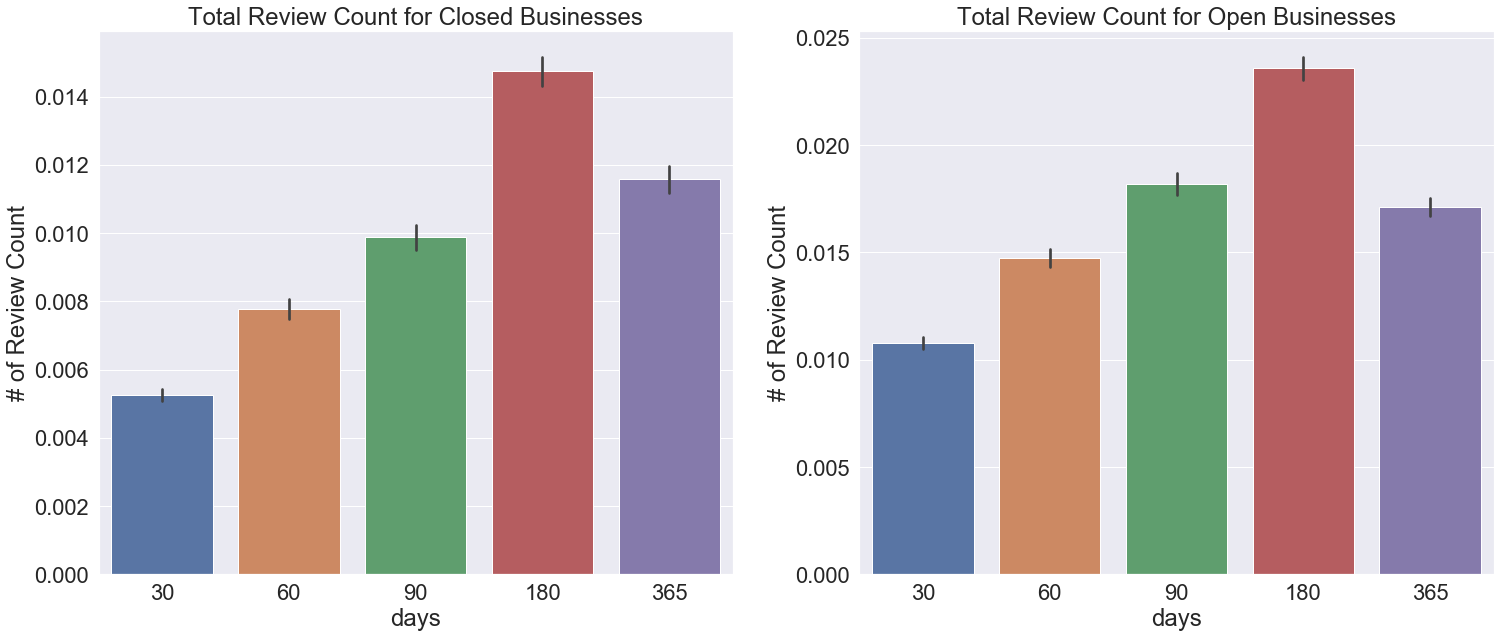

In [356]:
# Plot
sns.set(font_scale=2) # Increase font size
fig, (ax_one, ax_two) = plt.subplots(ncols=2, figsize=(25, 10))

sns.barplot(x='days', y='visits', data=flattened_close_df, ax=ax_one)
sns.barplot(x='days', y='visits', data=flattened_open_df, ax=ax_two)

ax_one.set(xlabel='days', ylabel='# of Review Count', title='Total Review Count for Closed Businesses')
ax_two.set(xlabel='days', ylabel='# of Review Count', title='Total Review Count for Open Businesses');

Both closed and open restaurants had upward trend in getting more review counts over last one year. The only difference between two is that open restaurants generally have more reviews.

In [357]:
agg_review_df = agg_review_df.drop(columns=['is_open'])

In [358]:
# Merge businesses and aggregated reviews dataframe based on business_id
business_df = business_df.merge(agg_review_df, on='business_id', how='inner')
business_df.head(3)

,business_id,name,review_count,stars,adjusted_stars,price,state,is_open,caters,goodforkids,...,average noise,loud noise,quiet,very loud,30_days_review_count,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,5,4,3.69,1.0,IL,1,0,0,...,0,0,1,0,0.00,0.00,0.0,0.00,0.0,6.07
1,lu7vtrp_bE9PnxWfA8g4Pg,banzai sushi,7,4,3.72,1.0,ON,1,0,1,...,1,0,0,0,0.00,0.00,0.0,0.00,0.0,6.30
2,DCsS3SgVFO56F6wRO_ewgA,missy donuts & coffee,7,2,3.20,1.0,AZ,0,0,0,...,1,0,0,0,0.02,0.01,0.0,0.02,0.0,0.59


## 1.4 Visualize businesses' revenues vs age

### Random select open businesses (n = closed_business_df.index)
Randomly select open businesses to compare with closed businesses since it has more review counts, higher average price points, and businesses. 

In [359]:
closed_business_df = business_df[business_df['is_open'] == 0]
open_business_df = business_df[business_df['is_open'] == 1]

# Randomly select open businesses based on closed businesses total count
random_open_biz_df = open_business_df.sample(n=closed_business_df.shape[0])

In [360]:
# Getting number of reviews per businesses
weekly_review_df = review_df.groupby('business_id').agg({'review_id': 'count'})
weekly_review_df.reset_index(level=weekly_review_df.index.names, inplace=True) # adding business_id as column
weekly_review_df['revenue'] = 0

# Create revenue column (# of reviews * price range)
for row in weekly_review_df.itertuples():
    price = business_df.loc[business_df['business_id'] == row.business_id]['price'].values[0]
    revenue = price * row.review_id
    weekly_review_df.at[row.Index, 'revenue'] = revenue
    
weekly_review_df.head(3)

,business_id,review_id,revenue
0,--1UhMGODdWsrMastO9DZw,29,58
1,--6MefnULPED_I942VcFNA,57,114
2,--7zmmkVg-IMGaXbuVd0SQ,68,68


In [361]:
# Add revenue column to business dataframe
df = weekly_review_df[['business_id', 'revenue']]
business_df = business_df.merge(df, on='business_id', how='inner')

In [362]:
# Update review dataframe since extreme outliers are removed
m = weekly_review_df['business_id'].isin(random_open_biz_df['business_id'])
open_biz = weekly_review_df[m].reset_index(drop=True)
y = weekly_review_df['business_id'].isin(closed_business_df['business_id'])
closed_biz = weekly_review_df[y].reset_index(drop=True)

weekly_review_df = pd.concat([open_biz, closed_biz])
weekly_review_df.shape

(28768, 3)

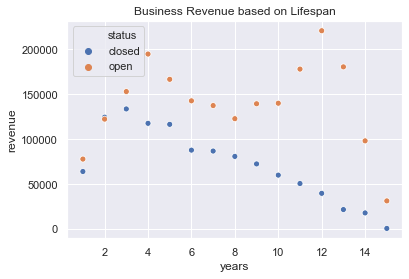

In [363]:
sns.set(font_scale=1) # Decrease font size

# Create closed and open business revenue dataframes 
closed_revenue_df = create_dataframes(closed_business_df, weekly_review_df)
open_revenue_df = create_dataframes(random_open_biz_df, weekly_review_df)

closed_revenue_df['status'] = 'closed'
open_revenue_df['status'] = 'open'

# Merge two dataframes
revenue_df = pd.concat([closed_revenue_df, open_revenue_df], axis=0)

# Scatter plot
ax = sns.scatterplot(x='years', y='revenue', hue='status', data=revenue_df)
ax.set(xlabel='years', ylabel='revenue', title='Business Revenue based on Lifespan');

After random sampling from open businesses, currently opened restaurants did consistently better than its closed businesses in terms of revenue. Closed restaurants had downward trend in sales as the year went on.

## 1.5 Identifying top 5 most common cuisines and venues
Create cuisines and venues dataframes and plot top 5 cuisines and venues

In [364]:
# Get cuisines and venues related columns in business dataframe
cuisine_cols = [col for col in business_df.columns if col in cuisines]
cuisines = business_df[cuisine_cols].sum().sort_values(ascending=False).keys()
cuisine_values = business_df[cuisine_cols].sum().sort_values(ascending=False).values

venue_cols = [col for col in business_df.columns if col in venues]
venues = business_df[venue_cols].sum().sort_values(ascending=False).keys()
venue_values = business_df[venue_cols].sum().sort_values(ascending=False).values

# Create cuisine and venue dataframes
venue_df = pd.DataFrame({'venue': venues, 'count': venue_values})
cuisine_df = pd.DataFrame({'cuisine': cuisines, 'count': cuisine_values})

In [365]:
# Top 5 venues
venue_df.head()

,venue,count
0,restaurants,33530
1,nightlife,9076
2,bars,8540
3,cafes,2126
4,bakeries,2057


In [366]:
# Top 5 cuisines
cuisine_df.head()

,cuisine,count
0,american (traditional),3877
1,american (new),3135
2,chinese,3017
3,italian,2987
4,mexican,2353


Restaurants is expected to have highest count since majority of the businesses serve food. In the following bar plots below, I was more curious about sub-categories of restaurants (i.e. bakeries, coffee shops etc.)

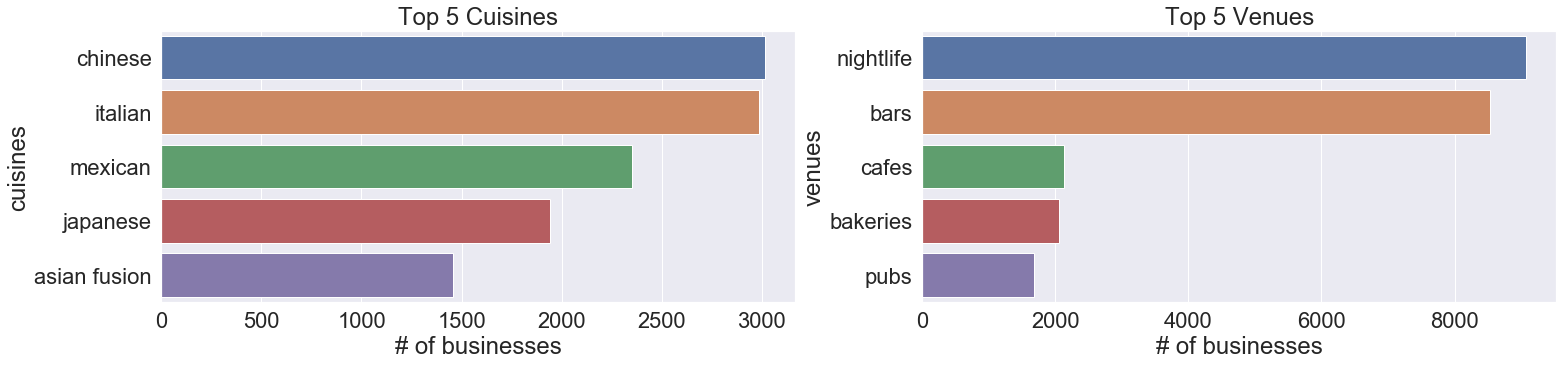

In [367]:
# Positioning plots
sns.set(font_scale=2) # Increase font size
fig, (ax_one, ax_two) = plt.subplots(ncols=2, figsize=(25, 5))

sns.barplot(x='count', y='cuisine', data=cuisine_df.head(7)[2:8], ax=ax_one)
sns.barplot(x='count', y='venue', data=venue_df.head(6)[1:6], ax=ax_two)

ax_one.set(xlabel='# of businesses', ylabel='cuisines', title='Top 5 Cuisines')
ax_two.set(xlabel='# of businesses', ylabel='venues', title='Top 5 Venues');

Besides American food; Mexican, Italian, Chinese, Asian fusion and Japanese food are the most common cuisines and common venues besides restaurants are nightlife, bars, caes, bakeries, and pub

## 1.6 Visualize average star ratings per cuisines and venues

In [368]:
cuisine_stars = []
for cuisine in cuisines:
    avg_star = round(business_df[business_df[cuisine] == 1]['adjusted_stars'].mean(),2)
    cuisine_stars.append(avg_star)

In [369]:
venue_stars = []
for venue in venues:
    avg_star = round(business_df[business_df[venue] == 1]['adjusted_stars'].mean(),2)
    venue_stars.append(avg_star)

In [370]:
# Create cuisine and venue dataframes
venue_df = pd.DataFrame({'venue': venues, 'adjusted_stars': venue_stars})
cuisine_df = pd.DataFrame({'cuisine': cuisines, 'adjusted_stars': cuisine_stars})

# Sort by stars values
venue_df = venue_df.sort_values(by='adjusted_stars', ascending=False).reset_index(drop=True)
cuisine_df = cuisine_df.sort_values(by = 'adjusted_stars', ascending=False).reset_index(drop=True)

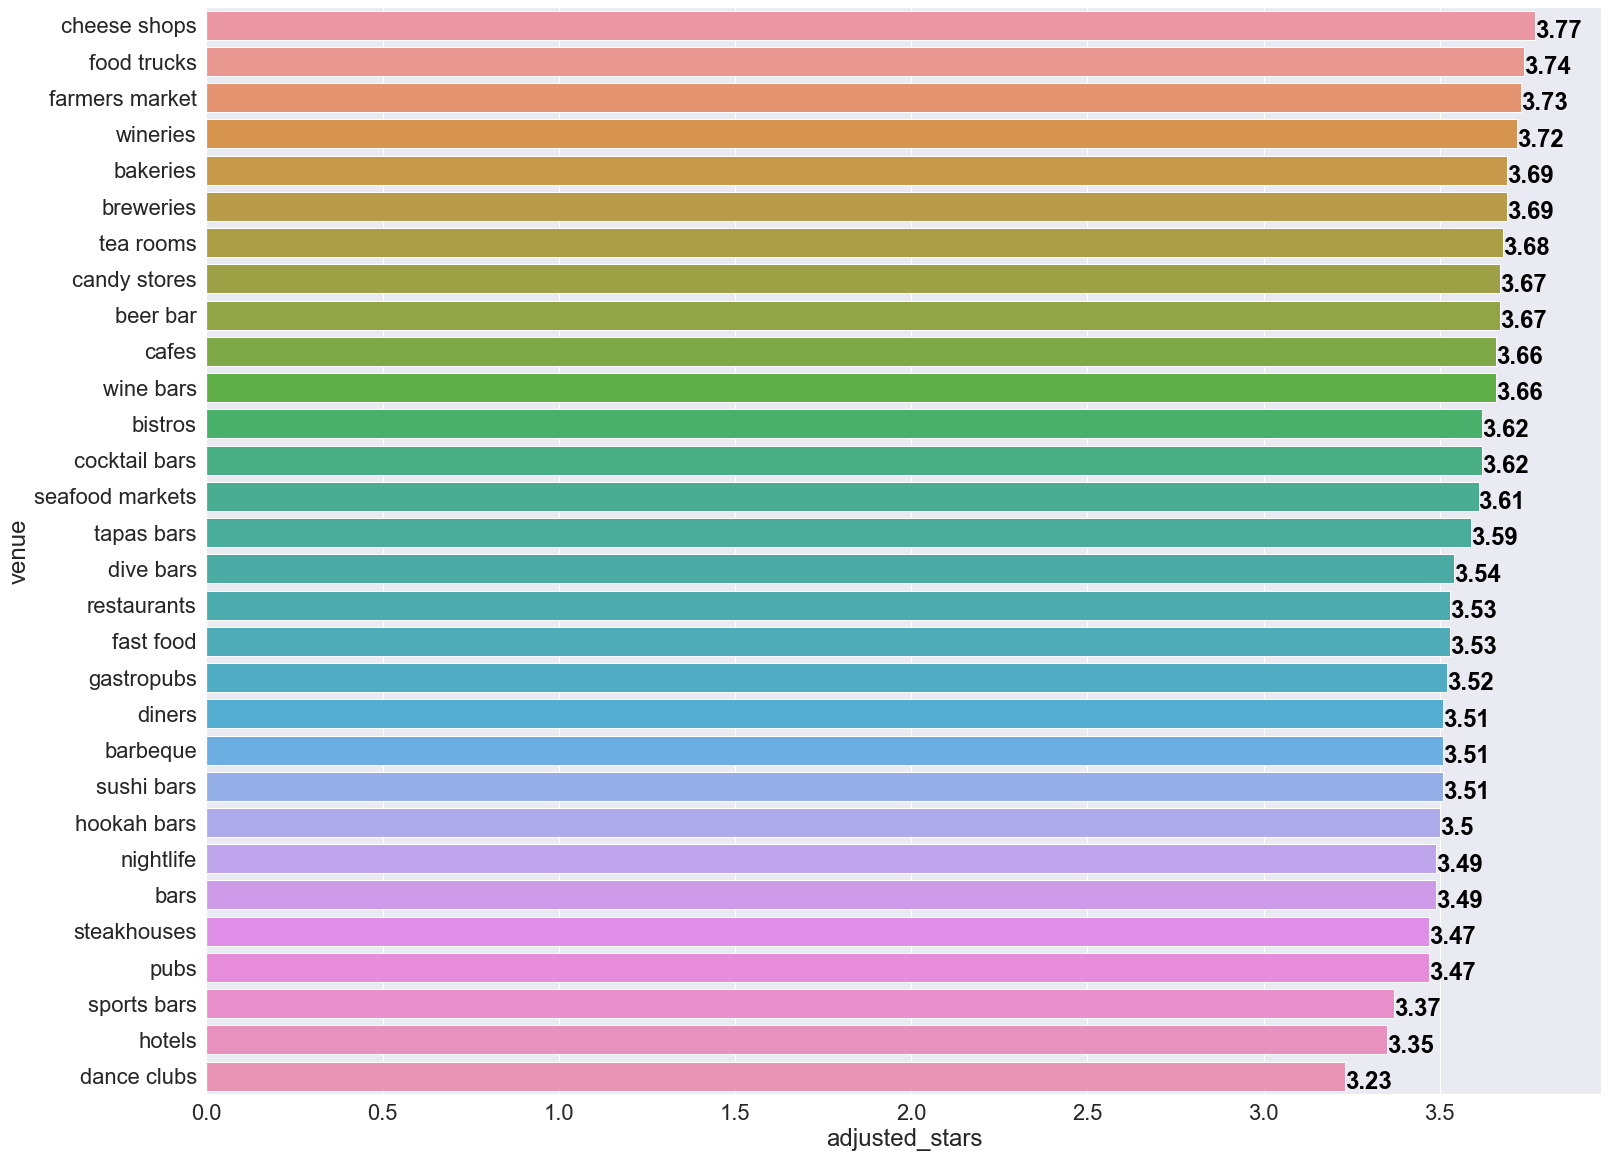

In [371]:
# Plot
fig, ax = plt.subplots(figsize=(25, 20)) # Adjust width/height of the chart

# Annotate values
for row in venue_df.itertuples():
     ax.text(row.adjusted_stars, row.Index + 0.35, row.adjusted_stars, color='black', weight='bold')
        
sns.barplot(x='adjusted_stars', y='venue', data=venue_df, ax=ax);

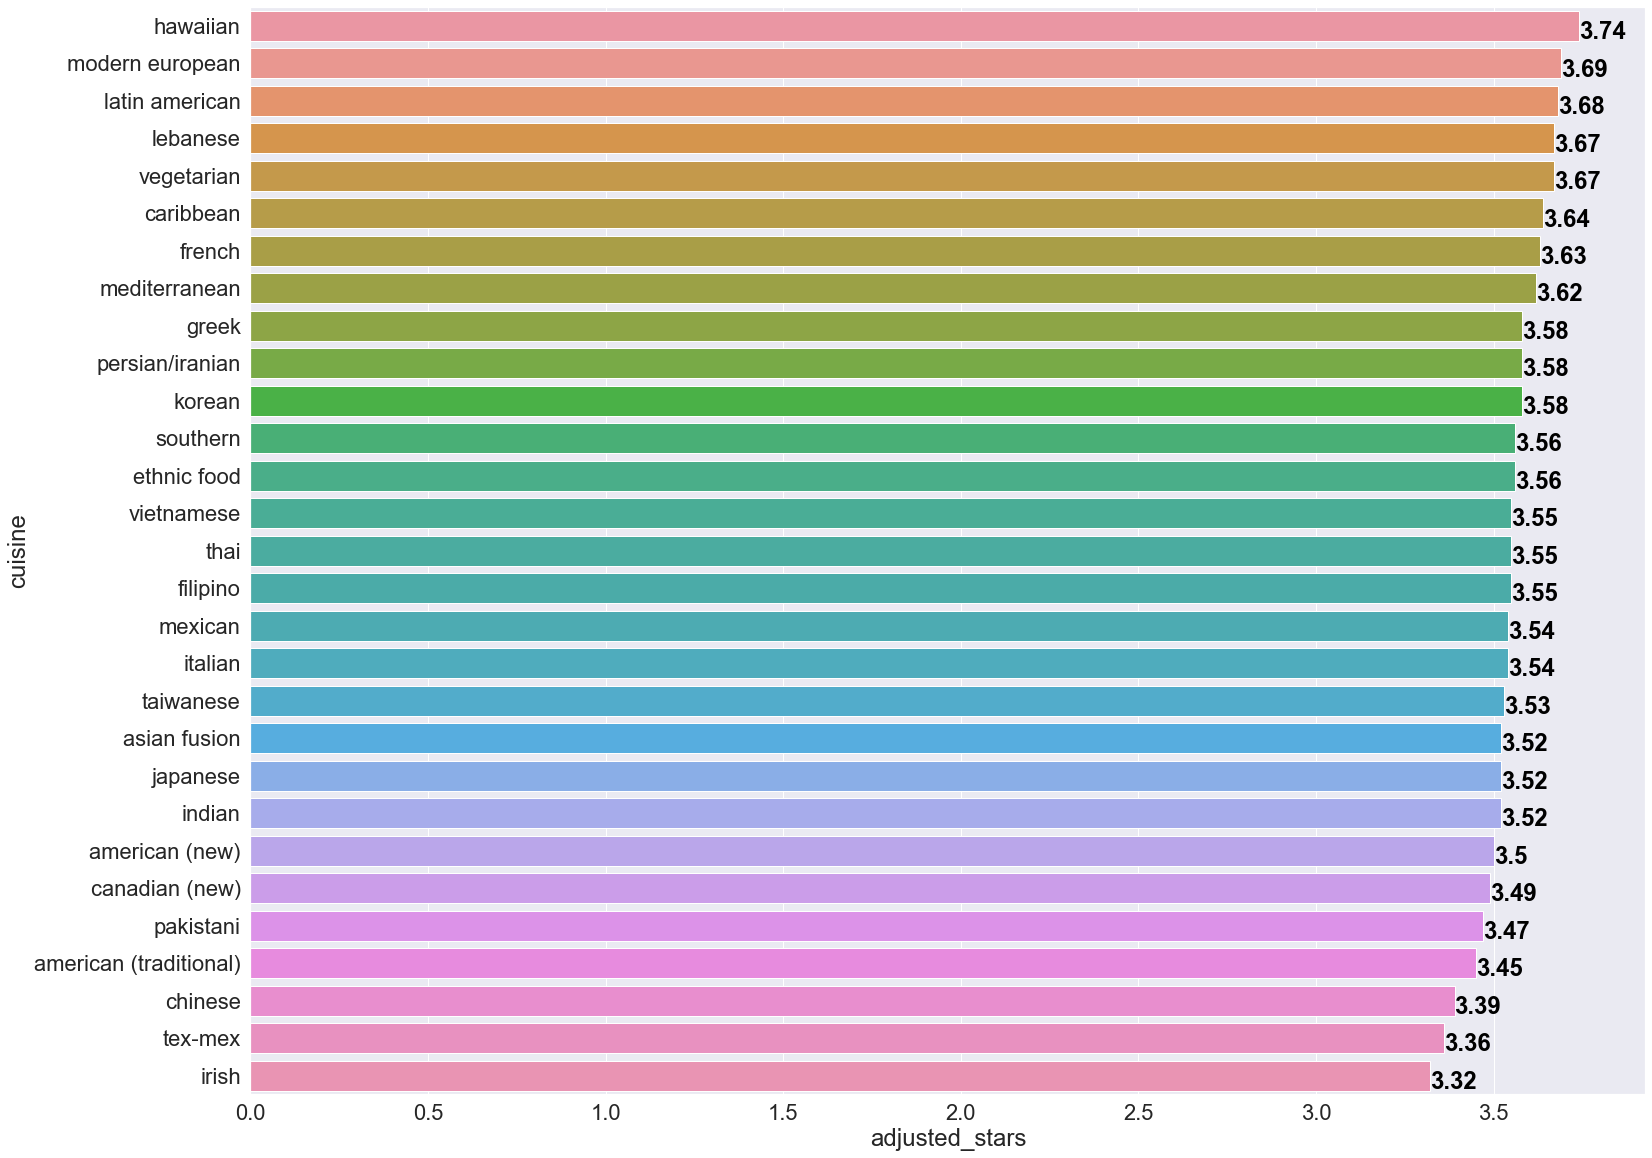

In [372]:
# Plot
fig, ax = plt.subplots(figsize=(25, 20)) # Adjust width/height of the chart

# Annotate values
for row in cuisine_df.itertuples():
     ax.text(row.adjusted_stars, row.Index + 0.35, row.adjusted_stars, color='black', weight='bold')
        
sns.barplot(x='adjusted_stars', y='cuisine', data=cuisine_df, ax=ax);

In [373]:
business_df[business_df[cuisine_df['cuisine'][:5][0]] == 1]

,business_id,name,review_count,stars,adjusted_stars,price,state,is_open,caters,goodforkids,...,loud noise,quiet,very loud,30_days_review_count,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan,revenue
833,Rb2s2-2kIvbPXnPEuM_OBg,kahunaville island restaurant,492,3,3.02,2.0,NV,0,0,0,...,0,0,0,0.04,0.06,0.10,0.08,0.09,8.92,998
901,iml9AGorGGEJ4oDOoNIfJA,no. 1 poke bowl,25,4,3.83,2.0,SC,1,1,0,...,0,0,0,0.00,0.02,0.03,0.05,0.03,0.63,50
977,coRAnWyBF9JliXFo3INm9A,pokéwave,8,4,3.73,2.0,ON,1,0,0,...,0,0,0,0.02,0.01,0.04,0.00,0.00,0.17,16
1041,U4ncU-YfIipnTetJDZLGlw,gogo poke lv,74,4,3.92,1.0,NV,0,0,1,...,0,0,0,0.03,0.07,0.10,0.07,0.10,0.72,75
1390,QXKN5MYb5O1sg6-G2pwTzg,shaka,24,4,3.83,2.0,PA,1,0,0,...,0,0,0,0.03,0.08,0.04,0.06,0.00,0.32,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,-qMvngKDOknyQP4bFW0PAw,big island hawaiian bbq,223,4,3.97,1.0,AZ,1,1,1,...,0,0,0,0.06,0.07,0.06,0.11,0.11,1.47,218
38374,40cI2Z3mW2CtBmwMui0klw,poke hale,174,4,3.96,2.0,AZ,1,0,1,...,0,1,0,0.01,0.04,0.01,0.05,0.05,2.10,354
38465,V1EdIokE0YYN__dNYfXRdA,pokeman,218,4,3.97,2.0,NV,1,1,1,...,0,0,0,0.02,0.04,0.03,0.04,0.02,3.42,434
39293,FNpdDxFJkU6MVgvUNRaDEQ,poké bol,9,5,4.05,2.0,QC,1,0,0,...,0,0,0,0.01,0.00,0.00,0.04,0.00,0.49,18


### Summary of Business Dataset
1. Removing extreme outliers to prevent decrease in statistical power.
2. Currently opened businesses tend to have higher review count, star ratings, revenues, and life span compared closed businesses.
3. Both open and closed businesses have downward trend in review count over course of 15 years. I'm theorizing that users are not as active in reviews compared to beginning of yelp service. Another interesting to note is that open businesses' downward trend is not as steep as closed businesses. 
4. American food, Mexican, Italian, and Japanese food is most common cuisines and common venues are nightlife, bars, sushi bars, bakeries, and sports bars in Las Vegas, Nevada. 
5. Japanese related restaurant appeard consistently as most common in terms of venue type and cuisine.
6. Beverage related venues such as bars and tea rooms ranked highly

## 2) Analyze Review Dataset
1. Define positive, neutral, negative reviews based on review text's sentiment
2. Define average text length of positive and negative reviews
3. Define # of positive and negative reviews for businesses
4. Visualize word cloud for top 10 highest and lowest ranked businesses' reviews
5. Average out sentiment analysis score based on business dataframe's business_id

In [375]:
review_df.shape

(2575058, 15)

### 2.1 Plot positive, neutral, negative reviews based on review text's sentiment scores
Compare closed and open businesses sentiment score visually

In [376]:
closed_business_df = closed_business_df.reset_index(drop=True)
opened_business_df = opened_business_df.reset_index(drop=True)

# Get closed reviews
m = review_df['business_id'].isin(closed_business_df['business_id'])
closed_review_df = review_df[m].reset_index(drop=True)

# Get open reviews
m = review_df['business_id'].isin(opened_business_df['business_id'])
opened_review_df = review_df[m].reset_index(drop=True)

In [377]:
# Get sentiment score averages for open
open_neg_mean = round(opened_review_df['neg'].mean(),3)
open_neu_mean = round(opened_review_df['neu'].mean(),3)
open_pos_mean = round(opened_review_df['pos'].mean(),3)
open_compound_mean = round(opened_review_df['compound'].mean(),3)

# Get sentiment score averages for close
closed_neg_mean = round(closed_review_df['neg'].mean(),3)
closed_neu_mean = round(closed_review_df['neu'].mean(),3)
closed_pos_mean = round(closed_review_df['pos'].mean(),3)
closed_compound_mean = round(closed_review_df['compound'].mean(),3)

In [378]:
d = {'neg': [open_neg_mean, closed_neg_mean], 
     'neu': [open_neu_mean, closed_neu_mean], 
     'pos': [open_pos_mean, closed_pos_mean], 
     'compound': [open_compound_mean, closed_compound_mean]}
sentiment_df = pd.DataFrame(data=d, index=['open', 'close'])
sentiment_df.head()

,neg,neu,pos,compound
open,0.039,0.742,0.219,0.711
close,0.042,0.750,0.208,0.697


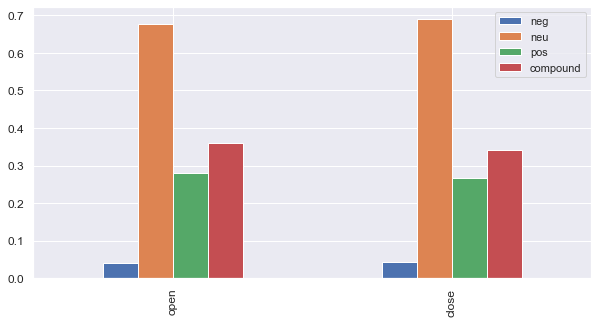

In [443]:
sentiment_df.plot.bar(figsize=(10, 5), fontsize=(12));

Generally, open restaurants have higher compound and positive sentiment scores while close restaurants have higher negative and neutral sentiment scores. Therefore, how users/customers perceive about the restaurants have some impact on whether restaurants will stay open or not

In [380]:
'''
The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

positive sentiment : (compound score >= 0.05)
neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
negative sentiment : (compound score <= -0.05)
'''

# Define positive, neutral, and negative review types
review_df.loc[review_df['compound'] >= 0.05, 'review_type'] = 1
review_df.loc[review_df['compound'] < 0.05, 'review_type'] = 0
review_df.loc[(review_df['compound'] > -0.05) & (review_df['compound'] < 0.05), 'review_type'] = 0.5

### 2.2 Define # of positive, neutral, and negative reviews
- Split reviews based on review_type column values
- Create text_count column
- Define average text count per review type
- Plot bargraph per review type

In [381]:
# Split reviews based on positive (1) and negative (0) based on review_type
pos_review_df = review_df[review_df['review_type'] == 1].reset_index(drop=True)
neu_review_df = review_df[review_df['review_type'] == 0.5].reset_index(drop=True)
neg_review_df = review_df[review_df['review_type'] == 0].reset_index(drop=True)

In [382]:
# Create new column - text_count
pos_review_df['text_count'] = pos_review_df['text'].str.split().apply(len)
neu_review_df['text_count'] = neu_review_df['text'].str.split().apply(len)
neg_review_df['text_count'] = neg_review_df['text'].str.split().apply(len)

In [383]:
# Get average text count
avg_pos_len = round(pos_review_df['text_count'].mean(),2)
avg_neu_len = round(neu_review_df['text_count'].mean(),2)
avg_neg_len = round(neg_review_df['text_count'].mean(),2)

# Get review count per review type
pos_count = pos_review_df.shape[0]
neu_count = neu_review_df.shape[0]
neg_count = neg_review_df.shape[0]

In [384]:
# Create dataframe
data = {'review_type': ['positive', 'neutral', 'negative'], 
        'text_count': [avg_pos_len, avg_neu_len, avg_neg_len], 
        'review_count': [pos_count, neu_count, neg_count]}

avg_text_df = pd.DataFrame(data)
avg_text_df.head()

,review_type,text_count,review_count
0,positive,107.24,2273486
1,neutral,63.84,33282
2,negative,99.33,268290


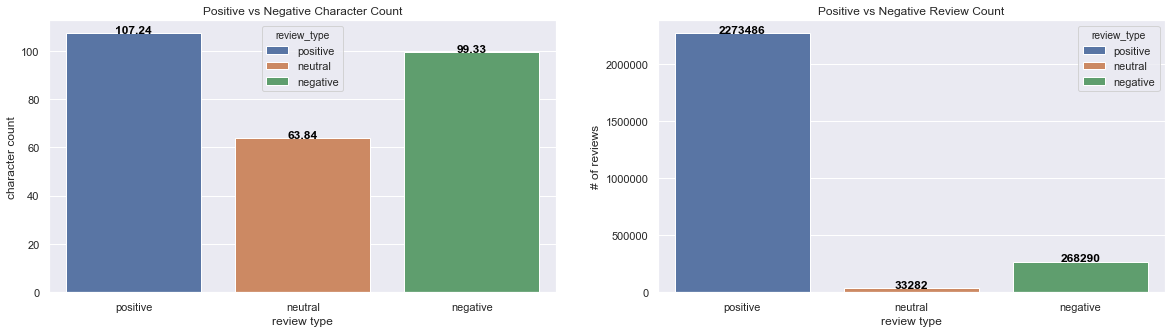

In [385]:
sns.set(font_scale=1)

# Create bar graph for average text count dataframe
fig, (ax_one, ax_two) = plt.subplots(ncols=2, figsize=(20, 5))

sns.barplot(x='review_type', y='text_count', hue='review_type', dodge=False, data=avg_text_df, ax=ax_one)
sns.barplot(x='review_type', y='review_count', hue='review_type', dodge=False, data=avg_text_df, ax=ax_two)

ax_one.set(xlabel='review type', ylabel='character count', title='Positive vs Negative Character Count');
ax_two.set(xlabel='review type', ylabel='# of reviews', title='Positive vs Negative Review Count');

# Annotate values
for row in avg_text_df.itertuples():
    ax_one.text(row.Index, row.text_count, row.text_count, color='black', ha='center', weight='bold')
    ax_two.text(row.Index, row.review_count, row.review_count, color='black', ha='center', weight='bold')

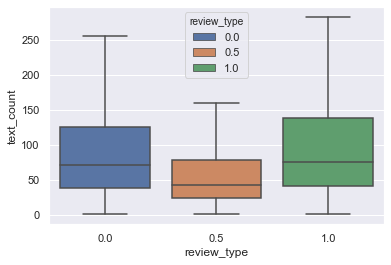

In [386]:
# Concat positive, neutral, negative review dataframes 
review_df = pd.concat([pos_review_df, neu_review_df, neg_review_df], axis=0)

# Plot boxplot based on review_type and its text count
ax = sns.boxplot(x='review_type', y='text_count', data=review_df, hue='review_type', 
                 dodge=False, showfliers=False)

Majority reviews are positive and had slightly higher average text count compared to neutral and negative reviews. 

### 2.3 Visualize word cloud for top 10 highest and lowest ranked businesses' reviews
- Open and closed businesses' word cloud

In [387]:
open_biz = business_df[business_df['is_open'] == 1]
closed_biz = business_df[business_df['is_open'] == 0]

In [388]:
# Get top and bottom 10 businesses based on star, review_count, and revenue
open_df = open_biz.sort_values(['stars', 'review_count', 'revenue'], ascending=False).head(10)
closed_df = closed_biz.sort_values(['stars', 'review_count', 'revenue']).head(10)

In [389]:
m = review_df['business_id'].isin(open_df['business_id'])
open_df = review_df[m].reset_index(drop=True)

n = review_df['business_id'].isin(closed_df['business_id'])
closed_df = review_df[n].reset_index(drop=True)

In [390]:
# Tokenize to remove stop words that got populated during lemmatization process
open_df['clean_text'] = open_df['text'].apply(lambda text: tokenize(text))
closed_df['clean_text'] = closed_df['text'].apply(lambda text: tokenize(text))

In [391]:
from collections import Counter

# Collect all text in text column
closed_text = ' '.join([i for i in closed_df['clean_text']]).split()
closed_text = dict(Counter(closed_text))

open_text = ' '.join([i for i in open_df['clean_text']]).split()
open_text = dict(Counter(open_text))

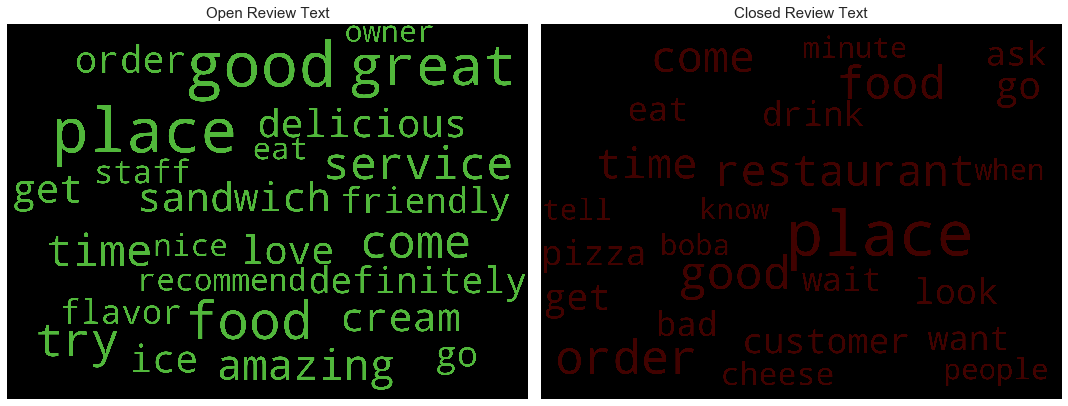

In [392]:
import matplotlib.colors as mcolors
import random

colors = [color for name, color in mcolors.XKCD_COLORS.items()]
random.shuffle(colors)

# instantiate word cloud
word_cloud = WordCloud(stopwords=stop_words,# using spacy's stopwords
                       width=2500, # width of canvas
                       height=1800, # height of canvas
                       max_words=25, # Shows top 10 words by weight
                       color_func=lambda *args, **kwargs: colors[i], # Sets color
                       prefer_horizontal=1.0) # Horizontal fitting

# row, column, size, share xlabel, share y label
fig, axes = plt.subplots(1, 2, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten(), 0):
    fig.add_subplot(ax)
    
    topic_words = closed_text
    title = 'Closed Review Text'
        
    if i == 0:
        topic_words = open_text
        title = 'Open Review Text'

    word_cloud.generate_from_frequencies(topic_words, max_font_size=300)  # Creates word cloud based on frequencies

    plt.gca().imshow(word_cloud) # imshow - display data as image
    plt.gca().set_title(f'{title}', fontdict=dict(size=15)) # setting title
    plt.gca().axis('off') # removing axis


plt.subplots_adjust(wspace=0, hspace=0)# remove spacing between axes
plt.axis('off')
plt.margins(x=0, y=0) # remove margins
plt.tight_layout() # automatically adjusts padding between and around subplots
plt.show()

Considering majority of the reviews are positive, there doesn't seem to be much difference between open and closed reviews. However, open review wordcloud tend to have more obvious positive adjectives compared to closed businesses' reviews.

### Summary of Review Dataset
1. Positive and compound sentiment scores are higher in open businesses while negative and neutral scores are higher in closed restaurants, hence there is some impact on how users/customers views restaurants may determine whether restaurant will stay open or not.
2. Positive reviews dominates the reviews dataframe with its total count and text count compared to neutral and negative reviews. This tells me that users are leniant or when user have bad experience with certain restaurants, they're more likely not to leave review.
3. Analyzing top 10 open restaurants' and bottom 10 closed restaurant reviews reveals that there are more positive words in open restaurants compared to closed restaurants which are mostly neutral to some negative words.

## 3) Analyze Tip Dataset
1. Visualize tips' sentiment scores and compare between closed and open restaurants.

### 3.1 Visualize tips' sentiment scores and compare between closed and open restaurants

In [393]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136880 entries, 0 to 1136885
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   business_id  1136880 non-null  object 
 1   text         1136880 non-null  object 
 2   date         1136880 non-null  object 
 3   neg          1136874 non-null  float64
 4   neu          1136874 non-null  float64
 5   pos          1136874 non-null  float64
 6   compound     1136874 non-null  float64
 7   text_count   1136880 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 78.1+ MB


In [394]:
tip_df.isna().sum() # check for nans

business_id    0
text           0
date           0
neg            6
neu            6
pos            6
compound       6
text_count     0
dtype: int64

In [395]:
tip_df.dropna(inplace=True)

In [396]:
tip_df.head()

,business_id,text,date,neg,neu,pos,compound,text_count
0,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0.0,1.000,0.000,0.0000,5
1,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0.0,1.000,0.000,0.0000,3
2,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0.0,0.241,0.759,0.8573,6
3,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0.0,0.652,0.348,0.4939,8
4,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0.0,0.498,0.502,0.7946,11


In [397]:
# Get closed tips
m = tip_df['business_id'].isin(closed_business_df['business_id'])
closed_tip_df = tip_df[m].reset_index(drop=True)

# Get open tips
m = tip_df['business_id'].isin(opened_business_df['business_id'])
opened_tip_df = tip_df[m].reset_index(drop=True)

# Get sentiment score averages for open
open_neg_mean = round(opened_tip_df['neg'].mean(),3)
open_neu_mean = round(opened_tip_df['neu'].mean(),3)
open_pos_mean = round(opened_tip_df['pos'].mean(),3)
open_compound_mean = round(opened_tip_df['compound'].mean(),3)

# Get sentiment score averages for close
closed_neg_mean = round(closed_tip_df['neg'].mean(),3)
closed_neu_mean = round(closed_tip_df['neu'].mean(),3)
closed_pos_mean = round(closed_tip_df['pos'].mean(),3)
closed_compound_mean = round(closed_tip_df['compound'].mean(),3)

d = {'neg': [open_neg_mean, closed_neg_mean], 
     'neu': [open_neu_mean, closed_neu_mean], 
     'pos': [open_pos_mean, closed_pos_mean], 
     'compound': [open_compound_mean, closed_compound_mean]}
sentiment_df = pd.DataFrame(data=d, index=['open', 'close'])
sentiment_df.head()

,neg,neu,pos,compound
open,0.042,0.677,0.280,0.360
close,0.043,0.689,0.267,0.342


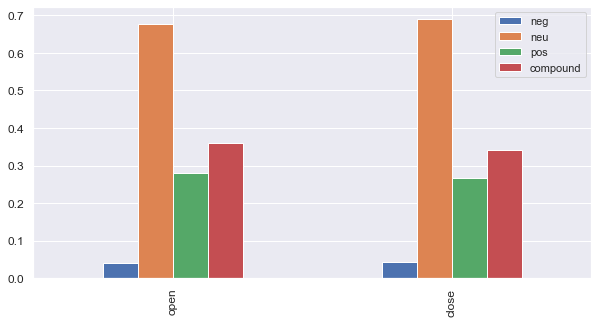

In [398]:
sentiment_df.plot.bar(figsize=(10, 5), fontsize=(12));

Similar to review dataset, open businesses tend to have higher positive and compound average scores while close businesses have higher negative and neutral scores.

## 4) Analyze Check-In Dataset
1. Visualize check-in counts per retaurant and compare between open and closed restaurants.
2. Update Business dataframe's revenue column based on total_checkins count

### 4.1 Visualize check-in counts per retaurant and compare between open and closed restaurants

In [399]:
# First remove businesses that had outlier businesses
m = checkin_df['business_id'].isin(business_df['business_id'])
checkin_df = checkin_df[m].reset_index(drop=True)

In [400]:
checkin_df.head()

,date,business_id
0,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...",--1UhMGODdWsrMastO9DZw
1,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...",--6MefnULPED_I942VcFNA
2,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...",--7zmmkVg-IMGaXbuVd0SQ
3,"2010-05-31 07:57:10, 2010-05-31 07:58:37, 2010...",--FBCX-N37CMYDfs790Bnw
4,"2019-09-19 02:42:57, 2019-09-22 19:46:39, 2019...",--FnvijzY20d1nk9H7fk9w


In [401]:
# Get total check-ins per restaurant
checkin_df['total_checkins'] = checkin_df['date'].str.split(',').apply(lambda x: len(x))

In [402]:
checkin_df.head()

,date,business_id,total_checkins
0,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...",--1UhMGODdWsrMastO9DZw,7
1,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...",--6MefnULPED_I942VcFNA,189
2,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...",--7zmmkVg-IMGaXbuVd0SQ,193
3,"2010-05-31 07:57:10, 2010-05-31 07:58:37, 2010...",--FBCX-N37CMYDfs790Bnw,552
4,"2019-09-19 02:42:57, 2019-09-22 19:46:39, 2019...",--FnvijzY20d1nk9H7fk9w,9


In [403]:
# Get closed checkins
m = checkin_df['business_id'].isin(closed_business_df['business_id'])
closed_checkin_df = checkin_df[m].reset_index(drop=True)

# Get open checkins
m = checkin_df['business_id'].isin(opened_business_df['business_id'])
opened_checkin_df = checkin_df[m].reset_index(drop=True)

In [404]:
closed_checkin_mean = closed_checkin_df['total_checkins'].mean()
opened_checkin_mean = opened_checkin_df['total_checkins'].mean()

In [405]:
d = {'checkin_count': [opened_checkin_mean, closed_checkin_mean]}
checkin_count_df = pd.DataFrame(data=d, index=['open', 'close'])
checkin_count_df.head()

,checkin_count
open,168.368068
close,95.182574


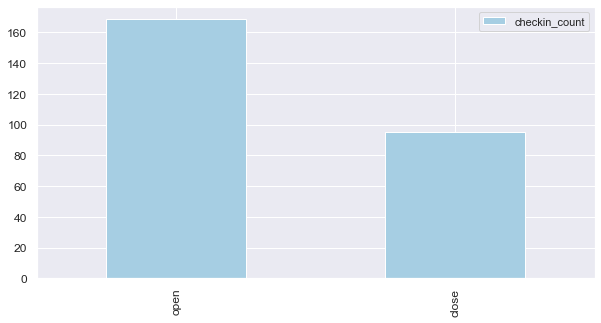

In [406]:
checkin_count_df.plot.bar(figsize=(10, 5), fontsize=(12), colormap='Paired');

Generally, open restaurants have higher check-in counts compared to closed restaurants check-in counts.

## 5. Update Business dataframe by adding sentiment analysis score, user_review_type and updating revenue
- Average out sentiment analysis score (tips and reviews) based on business dataframe's business_id
- Update Business dataframe's revenue column based on total_checkins count
- Define positive and negative reviews based on user average rating
- Get total star rating count (star_1.0, star_2.0, etc.) per restaurant

### 5.1 Average out sentiment analysis score (tips and reviews) based on business dataframe's business_id
Get average sentiment analysis scores and append it to business dataframe.

In [407]:
agg_sentiment_df = review_df[['business_id', 
                              'neg', 
                              'neu', 
                              'pos', 
                              'compound'
                             ]].groupby('business_id').agg({'neg': 'mean', 
                                                            'neu': 'mean', 
                                                            'pos': 'mean',
                                                            'compound': 'mean'})

agg_sentiment_df

,neg,neu,pos,compound
business_id,,,,
--1UhMGODdWsrMastO9DZw,0.036448,0.761621,0.202034,0.728924
--6MefnULPED_I942VcFNA,0.044053,0.797263,0.158649,0.666304
--7zmmkVg-IMGaXbuVd0SQ,0.047588,0.721147,0.231397,0.745534
--FBCX-N37CMYDfs790Bnw,0.041928,0.692974,0.265118,0.731828
--FnvijzY20d1nk9H7fk9w,0.044100,0.715500,0.240300,0.754250
...,...,...,...,...
zzmIMvqiBJ_-wVKg_OnGpw,0.036971,0.746324,0.216705,0.694830
zzsU528uoRB6qZUGhKDa6w,0.071429,0.781286,0.147286,0.559871
zzwaS0xn1MVEPEf0hNLjew,0.041909,0.748065,0.210026,0.700299


In [408]:
# Merge two dataframes
business_df = business_df.merge(agg_sentiment_df, on='business_id', how='inner')
business_df

,business_id,name,review_count,stars,adjusted_stars,price,state,is_open,caters,goodforkids,...,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan,revenue,neg,neu,pos,compound
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,5,4,3.69,1.0,IL,1,0,0,...,0.00,0.00,0.00,0.00,6.07,5,0.024400,0.732400,0.243200,0.905820
1,lu7vtrp_bE9PnxWfA8g4Pg,banzai sushi,7,4,3.72,1.0,ON,1,0,1,...,0.00,0.00,0.00,0.00,6.30,7,0.035286,0.758714,0.205857,0.634757
2,DCsS3SgVFO56F6wRO_ewgA,missy donuts & coffee,7,2,3.20,1.0,AZ,0,0,0,...,0.01,0.00,0.02,0.00,0.59,8,0.113625,0.721625,0.165000,0.251425
3,98hyK2QEUeI8v2y0AghfZA,pho lee's vietnamese restaurant,23,4,3.82,2.0,OH,1,0,0,...,0.04,0.10,0.05,0.00,0.37,48,0.026167,0.742792,0.231000,0.823267
4,Mmd5WDFq9hHcQ3uClngGjQ,irene's tap room,79,4,3.92,2.0,AZ,1,0,0,...,0.04,0.03,0.04,0.05,1.38,160,0.023612,0.706813,0.269575,0.817765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39819,wjZ12shpUWAy4Boy0G5z1g,island buffet,9,1,2.81,4.0,NV,0,0,0,...,0.00,0.00,0.00,0.00,6.93,32,0.095500,0.763750,0.140750,0.064675
39820,cmsAFAymfVoBitSF8R6GKw,yao fine chinese cuisine,230,4,3.97,1.0,AZ,1,1,1,...,0.02,0.06,0.01,0.04,11.32,235,0.035209,0.734745,0.230072,0.716946
39821,n2BKYb8aw4AhRKLkdUjQRg,steak & cheese & quick pita restaurant,21,2,2.79,1.0,ON,1,0,1,...,0.00,0.00,0.01,0.00,10.78,22,0.072182,0.793682,0.134227,0.328223
39822,xVpE01l6ZXdEtVf5PkRpDg,julep,95,4,3.93,2.0,WI,0,0,0,...,0.01,0.04,0.08,0.07,1.38,194,0.030351,0.728567,0.241093,0.830493


### 5.2 Prepare and create model data to be used for statistic analysis and machine learning
Update Business dataframe's revenue column based on total_checkins count.
Revenues will be calculated as follows:
- checkin_df's total_checkins * business_df's price
- Update business_df's revenue by adding checkin_df's revenue

In [409]:
agg_checkin_df = checkin_df[['business_id', 'total_checkins']].groupby('business_id').sum()
business_df[['business_id', 'price']]
# Merge two dataframes
agg_checkin_df = business_df[['business_id','price']].merge(agg_checkin_df, on='business_id', how='inner')

# Add new values to revenue column by multplying total_checkins with business price
agg_checkin_df['revenue'] = agg_checkin_df['price'] * agg_checkin_df['total_checkins']

# Remove price and total_checkins column
agg_checkin_df = agg_checkin_df[['business_id', 'revenue']]

# Merge with business dataframe (left)
business_df = business_df.merge(agg_checkin_df, on='business_id', how='left')

# Fill in revenue_y NaNs to 0
biz_df.fillna(0, inplace=True)

# Update revenue column by combining revenue_x and revenue_y
business_df['revenue'] = business_df['revenue_x'] + business_df['revenue_y']

# Drop revenue_x and revenue_y columns
business_df.drop(columns=['revenue_x', 'revenue_y'], inplace=True)
business_df.head()

,business_id,name,review_count,stars,adjusted_stars,price,state,is_open,caters,goodforkids,...,60_days_review_count,90_days_review_count,180_days_review_count,365_days_review_count,lifespan,neg,neu,pos,compound,revenue
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,5,4,3.69,1.0,IL,1,0,0,...,0.00,0.00,0.00,0.00,6.07,0.024400,0.732400,0.243200,0.905820,8.0
1,lu7vtrp_bE9PnxWfA8g4Pg,banzai sushi,7,4,3.72,1.0,ON,1,0,1,...,0.00,0.00,0.00,0.00,6.30,0.035286,0.758714,0.205857,0.634757,15.0
2,DCsS3SgVFO56F6wRO_ewgA,missy donuts & coffee,7,2,3.20,1.0,AZ,0,0,0,...,0.01,0.00,0.02,0.00,0.59,0.113625,0.721625,0.165000,0.251425,9.0
3,98hyK2QEUeI8v2y0AghfZA,pho lee's vietnamese restaurant,23,4,3.82,2.0,OH,1,0,0,...,0.04,0.10,0.05,0.00,0.37,0.026167,0.742792,0.231000,0.823267,74.0
4,Mmd5WDFq9hHcQ3uClngGjQ,irene's tap room,79,4,3.92,2.0,AZ,1,0,0,...,0.04,0.03,0.04,0.05,1.38,0.023612,0.706813,0.269575,0.817765,492.0


### 5.3 Define positive and negative reviews based on user average rating
Every user rates differently and star ratings can be subjective; therefore, to minimize subjectivity, I am defining whether the review is positive or negative relative to user's average rating. For example, if user rated one restaurant with 2.5 but has the given average rating of 2.1 stars, I am defining as positive since its above the average.

In [411]:
'''
Creating review_type column which will identify whether it is positive/negative relative to user's average rating 
for review dataframe. 0 being negative and 1 being positive
'''
review_df['pos_review'] = 0
review_df['neg_review'] = 0
review_df.head(3)

,review_id,user_id,business_id,stars,text,cool,useful,date,neg,neu,pos,compound,review_type,average_stars,text_count,pos_review,neg_review
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,I love Deagan's. I do. I really do. The atmosp...,0.0,1.0,2015-12-05 03:18:11,0.026,0.745,0.229,0.9499,1.0,4.02,83,0,0
1,14_N-s_7TsEpzgjnXJMu9Q,V34qejxNsCbcgD8C0HVk-Q,eoJfl5vG7X87QhcKb0nt5Q,4.0,This is exactly what you think it will be. A h...,3.0,4.0,2014-11-27 05:28:11,0.000,0.682,0.318,0.9862,1.0,4.02,88,0,0
2,B6-F7JQzRIiMQpphyPR3VA,V34qejxNsCbcgD8C0HVk-Q,0youcKV6-eE3F2MQj1l6Fw,4.0,I attended a group event here with about 80 pe...,1.0,1.0,2014-11-08 19:11:34,0.000,0.676,0.324,0.9814,1.0,4.02,69,0,0


In [414]:
m = user_df['user_id'].isin(review_df['user_id'])
user_df = user_df[m].reset_index(drop=True)

In [415]:
# Get user_id and average_stars column from user dataframe
user_star_df = user_df[['user_id', 'average_stars']]

# Merge two dataframes based on common user_id values - adding average_stars column
review_df = pd.merge(review_df, user_star_df, on=['user_id'])

# When star rating per review is higher than user's avg star rating - set review_type as 1 (positive rating)
review_df.loc[review_df['stars'] >= review_df['average_stars'], 'pos_review'] = 1
review_df.loc[review_df['stars'] < review_df['average_stars'], 'neg_review'] = 1

In [417]:
review_type_df = review_df[['business_id', 'pos_review', 'neg_review']].groupby('business_id').sum()
review_type_df.head()

,pos_review,neg_review
business_id,,
--1UhMGODdWsrMastO9DZw,20,9
--6MefnULPED_I942VcFNA,26,31
--7zmmkVg-IMGaXbuVd0SQ,46,22
--FBCX-N37CMYDfs790Bnw,97,55
--FnvijzY20d1nk9H7fk9w,8,2


In [418]:
# Merge two dataframes
business_df = business_df.merge(review_type_df, on='business_id', how='inner')
business_df

,business_id,name,review_count,stars,adjusted_stars,price,state,is_open,caters,goodforkids,...,180_days_review_count,365_days_review_count,lifespan,neg,neu,pos,compound,revenue,pos_review,neg_review
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,5,4,3.69,1.0,IL,1,0,0,...,0.00,0.00,6.07,0.024400,0.732400,0.243200,0.905820,8.0,4,1
1,lu7vtrp_bE9PnxWfA8g4Pg,banzai sushi,7,4,3.72,1.0,ON,1,0,1,...,0.00,0.00,6.30,0.035286,0.758714,0.205857,0.634757,15.0,6,1
2,DCsS3SgVFO56F6wRO_ewgA,missy donuts & coffee,7,2,3.20,1.0,AZ,0,0,0,...,0.02,0.00,0.59,0.113625,0.721625,0.165000,0.251425,9.0,3,5
3,98hyK2QEUeI8v2y0AghfZA,pho lee's vietnamese restaurant,23,4,3.82,2.0,OH,1,0,0,...,0.05,0.00,0.37,0.026167,0.742792,0.231000,0.823267,74.0,19,5
4,Mmd5WDFq9hHcQ3uClngGjQ,irene's tap room,79,4,3.92,2.0,AZ,1,0,0,...,0.04,0.05,1.38,0.023612,0.706813,0.269575,0.817765,492.0,68,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39819,wjZ12shpUWAy4Boy0G5z1g,island buffet,9,1,2.81,4.0,NV,0,0,0,...,0.00,0.00,6.93,0.095500,0.763750,0.140750,0.064675,56.0,0,8
39820,cmsAFAymfVoBitSF8R6GKw,yao fine chinese cuisine,230,4,3.97,1.0,AZ,1,1,1,...,0.01,0.04,11.32,0.035209,0.734745,0.230072,0.716946,654.0,171,64
39821,n2BKYb8aw4AhRKLkdUjQRg,steak & cheese & quick pita restaurant,21,2,2.79,1.0,ON,1,0,1,...,0.01,0.00,10.78,0.072182,0.793682,0.134227,0.328223,29.0,6,16
39822,xVpE01l6ZXdEtVf5PkRpDg,julep,95,4,3.93,2.0,WI,0,0,0,...,0.08,0.07,1.38,0.030351,0.728567,0.241093,0.830493,388.0,72,25


In [425]:
review_rating_meta_dummies = pd.get_dummies(review_df, columns=['stars'])

# Sum all stars
review_rating_meta_dummies = review_rating_meta_dummies.groupby(['business_id']).sum().reset_index()
review_rating_meta_dummies

,business_id,cool,useful,neg,neu,pos,compound,review_type,average_stars_x,text_count,pos_review,neg_review,average_stars_y,average_stars,stars_1.0,stars_2.0,stars_3.0,stars_4.0,stars_5.0
0,--1UhMGODdWsrMastO9DZw,16.0,20.0,1.057,22.087,5.859,21.1388,26.0,112.51,2752,20,9,112.51,112.51,2.0,2.0,2.0,9.0,14.0
1,--6MefnULPED_I942VcFNA,36.0,95.0,2.511,45.444,9.043,37.9793,49.0,186.44,8064,26,31,186.44,186.44,15.0,9.0,11.0,12.0,10.0
2,--7zmmkVg-IMGaXbuVd0SQ,72.0,92.0,3.236,49.038,15.735,50.6963,62.0,257.43,6397,46,22,257.43,257.43,5.0,7.0,6.0,19.0,31.0
3,--FBCX-N37CMYDfs790Bnw,97.0,133.0,6.373,105.332,40.298,111.2378,136.0,580.60,13441,97,55,580.60,580.60,25.0,10.0,11.0,35.0,71.0
4,--FnvijzY20d1nk9H7fk9w,4.0,9.0,0.441,7.155,2.403,7.5425,9.0,38.41,1063,8,2,38.41,38.41,0.0,1.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39819,zzmIMvqiBJ_-wVKg_OnGpw,65.0,134.0,5.139,103.739,30.122,96.5814,124.0,534.01,13741,102,37,534.01,534.01,12.0,9.0,10.0,29.0,79.0
39820,zzsU528uoRB6qZUGhKDa6w,15.0,19.0,0.500,5.469,1.031,3.9191,6.0,27.02,1040,4,3,27.02,27.02,0.0,1.0,1.0,2.0,3.0
39821,zzwaS0xn1MVEPEf0hNLjew,68.0,103.0,3.227,57.601,16.172,53.9230,69.5,287.50,6583,40,37,287.50,287.50,13.0,4.0,13.0,26.0,21.0
39822,zzwhN7x37nyjP0ZM8oiHmw,31.0,62.0,2.359,53.408,22.229,64.0429,72.5,307.98,6709,59,19,307.98,307.98,5.0,2.0,6.0,27.0,38.0


### 5.4 Get total star rating count (star_1.0, star_2.0, etc.) per restaurant
Get total star rating per restaurant

In [435]:
stars_df = review_rating_meta_dummies[['business_id','stars_1.0', 'stars_2.0','stars_3.0','stars_4.0','stars_5.0']]

# Merge two dataframes
business_df = business_df.merge(stars_df, on='business_id', how='inner')
business_df

,business_id,name,review_count,stars,adjusted_stars,price,state,is_open,caters,goodforkids,...,pos,compound,revenue,pos_review,neg_review,stars_1.0,stars_2.0,stars_3.0,stars_4.0,stars_5.0
0,pQeaRpvuhoEqudo3uymHIQ,the empanadas house,5,4,3.69,1.0,IL,1,0,0,...,0.243200,0.905820,8.0,4,1,0.0,1.0,0.0,0.0,4.0
1,lu7vtrp_bE9PnxWfA8g4Pg,banzai sushi,7,4,3.72,1.0,ON,1,0,1,...,0.205857,0.634757,15.0,6,1,0.0,0.0,1.0,2.0,4.0
2,DCsS3SgVFO56F6wRO_ewgA,missy donuts & coffee,7,2,3.20,1.0,AZ,0,0,0,...,0.165000,0.251425,9.0,3,5,2.0,3.0,0.0,1.0,2.0
3,98hyK2QEUeI8v2y0AghfZA,pho lee's vietnamese restaurant,23,4,3.82,2.0,OH,1,0,0,...,0.231000,0.823267,74.0,19,5,0.0,1.0,2.0,6.0,15.0
4,Mmd5WDFq9hHcQ3uClngGjQ,irene's tap room,79,4,3.92,2.0,AZ,1,0,0,...,0.269575,0.817765,492.0,68,12,3.0,1.0,4.0,8.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39819,wjZ12shpUWAy4Boy0G5z1g,island buffet,9,1,2.81,4.0,NV,0,0,0,...,0.140750,0.064675,56.0,0,8,6.0,1.0,1.0,0.0,0.0
39820,cmsAFAymfVoBitSF8R6GKw,yao fine chinese cuisine,230,4,3.97,1.0,AZ,1,1,1,...,0.230072,0.716946,654.0,171,64,16.0,8.0,22.0,62.0,127.0
39821,n2BKYb8aw4AhRKLkdUjQRg,steak & cheese & quick pita restaurant,21,2,2.79,1.0,ON,1,0,1,...,0.134227,0.328223,29.0,6,16,8.0,3.0,7.0,3.0,1.0
39822,xVpE01l6ZXdEtVf5PkRpDg,julep,95,4,3.93,2.0,WI,0,0,0,...,0.241093,0.830493,388.0,72,25,5.0,12.0,8.0,20.0,52.0


#### Filter out columns that are not needed
Remove name, stars, and state columns from the dataframe

In [453]:
business_df.drop(['name', 'stars', 'state', 'business_id'], axis=1, inplace=True)

#### Normalize value between 0-1 except  is_open column
Normalizing value on all columns to improve the convergence speed during machine learning

In [454]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() # instantiate

business_df[business_df.columns] = min_max_scaler.fit_transform(business_df[business_df.columns])
business_df.head()

,review_count,adjusted_stars,price,is_open,caters,goodforkids,alcohol,goodforgroups,tableservice,drivethru,...,pos,compound,revenue,pos_review,neg_review,stars_1.0,stars_2.0,stars_3.0,stars_4.0,stars_5.0
0,0.001342,0.670984,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.535683,0.953855,0.000066,0.005952,0.002024,0.000000,0.007353,0.000000,0.000000,0.006250
1,0.004027,0.678756,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.453430,0.806740,0.000157,0.008929,0.002024,0.000000,0.000000,0.005917,0.006329,0.006250
2,0.004027,0.544041,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.363436,0.598692,0.000079,0.004464,0.010121,0.006154,0.022059,0.000000,0.003165,0.003125
3,0.025503,0.704663,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.508811,0.909050,0.000931,0.028274,0.010121,0.000000,0.007353,0.011834,0.018987,0.023438
4,0.100671,0.730570,0.333333,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.593778,0.906064,0.006413,0.101190,0.024291,0.009231,0.007353,0.023669,0.025316,0.100000


#### Saving dataframe used for statistical analysis and machine learning

In [459]:
# business_df.to_csv('./dataset/test_business.csv')
business_df.to_csv('./dataset/test.csv')